# Example Customer Churn Analysis

In [14]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [15]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 80
pd.options.display.max_rows = 80

## OBTAIN
Import data file

In [18]:
cols_to_use = ['Mou', 'Recchrge', 'Roam', 'Changem', 'Custcare',
               'Dropvce', 'Blckvce', 'Unansvce', 'Threeway', 'Outcalls',
               'Incalls', 'Peakvce', 'Callwait', 'Months', 'Eqpdays', 'Age1',
               'Credita', 'Creditaa', 'Creditb', 'Creditc', 'Creditde',
               'Creditgy', 'Creditz', 'Prizmrur', 'Prizmub', 'Prizmtwn', 
               'Refurb', 'Occprof', 'Occstud', 'Occhmkr', 'Occret', 'Occself', 
               'Refer', 'Marryyes', 'Mailord', 'Mailres', 'Income', 'Incmiss', 
               'Csa',
               'Churn']

In [19]:
## Read in and preview dataset
data = pd.read_csv('Data/cell2cell_data.csv', usecols=cols_to_use)
data.head()

,Mou,Recchrge,Roam,Changem,Dropvce,Blckvce,Unansvce,Custcare,Threeway,Outcalls,Incalls,Peakvce,Callwait,Months,Csa,Eqpdays,Age1,Credita,Creditaa,Creditb,Creditc,Creditde,Creditgy,Creditz,Prizmrur,Prizmub,Prizmtwn,Refurb,Occprof,Occstud,Occhmkr,Occret,Occself,Marryyes,Mailord,Mailres,Refer,Incmiss,Income,Churn
0,219.25,22.50,0.0,-157.25,0.666667,0.666667,6.333333,0.000000,0.0,0.000000,0.000000,58.000000,0.333333,61,SEAPOR503,361,62.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,4,1
1,10.25,16.99,0.0,-4.25,0.333333,0.000000,2.666667,0.000000,0.0,0.000000,0.000000,5.000000,0.000000,58,PITHOM412,1504,40.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,5,1
2,7.50,38.00,0.0,-1.50,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,1.333333,0.000000,60,MILMIL414,1812,26.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,6,0
3,570.50,71.98,0.0,38.50,9.666667,0.666667,77.000000,8.666667,0.0,14.666667,0.666667,97.333333,0.000000,57,NNYSYR315,434,56.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,0
4,0.00,16.99,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,53,OKCTUL918,852,46.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,9,1


In [20]:
## Examine descriptive statistics
data.describe()

,Mou,Recchrge,Roam,Changem,Dropvce,Blckvce,Unansvce,Custcare,Threeway,Outcalls,Incalls,Peakvce,Callwait,Months,Eqpdays,Age1,Credita,Creditaa,Creditb,Creditc,Creditde,Creditgy,Creditz,Prizmrur,Prizmub,Prizmtwn,Refurb,Occprof,Occstud,Occhmkr,Occret,Occself,Marryyes,Mailord,Mailres,Refer,Incmiss,Income,Churn
count,39859.00000,39859.000000,39859.000000,39639.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,39294.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,513.97351,46.271960,1.228694,-15.006928,5.940213,4.030525,27.771762,1.778229,0.284450,24.836208,7.993717,88.685446,1.790696,18.831750,392.839500,31.062427,0.171550,0.377100,0.167875,0.101700,0.11815,0.022200,0.041425,0.049800,0.318825,0.149300,0.144725,0.173550,0.007300,0.003025,0.014225,0.017850,0.365325,0.357225,0.372425,0.047850,0.252650,4.330900,0.500000
std,524.75989,23.714145,8.329852,259.646507,8.880774,10.495103,38.250252,5.175107,1.074865,34.764911,16.611850,102.933661,5.375079,9.624604,256.715982,22.057552,0.376994,0.484666,0.373760,0.302257,0.32279,0.147335,0.199274,0.217534,0.466027,0.356388,0.351828,0.378727,0.085129,0.054917,0.118419,0.132408,0.481527,0.479188,0.483457,0.249223,0.434537,3.144329,0.500006
min,0.00000,-11.290000,0.000000,-2867.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.25000,30.000000,0.000000,-87.500000,0.666667,0.000000,5.000000,0.000000,0.000000,3.000000,0.000000,21.666667,0.000000,11.000000,212.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,356.50000,44.990000,0.000000,-6.250000,3.000000,1.000000,16.000000,0.000000,0.000000,13.000000,2.000000,61.000000,0.333333,17.000000,342.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.500000
75%,702.50000,59.990000,0.235000,63.000000,7.666667,3.666667,36.000000,1.333333,0.333333,33.000000,8.666667,118.666667,1.333333,24.000000,532.000000,48.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,7.000000,1.000000
max,7667.75000,349.572500,850.862500,5192.250000,221.666667,314.666667,848.666667,365.666667,55.666667,610.333333,519.333333,2090.666667,212.666667,61.000000,1823.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,9.000000,1.000000


In [21]:
## Examine metadata for DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mou       39859 non-null  float64
 1   Recchrge  39859 non-null  float64
 2   Roam      39859 non-null  float64
 3   Changem   39639 non-null  float64
 4   Dropvce   40000 non-null  float64
 5   Blckvce   40000 non-null  float64
 6   Unansvce  40000 non-null  float64
 7   Custcare  40000 non-null  float64
 8   Threeway  40000 non-null  float64
 9   Outcalls  40000 non-null  float64
 10  Incalls   40000 non-null  float64
 11  Peakvce   40000 non-null  float64
 12  Callwait  40000 non-null  float64
 13  Months    40000 non-null  int64  
 14  Csa       39983 non-null  object 
 15  Eqpdays   40000 non-null  int64  
 16  Age1      39294 non-null  float64
 17  Credita   40000 non-null  int64  
 18  Creditaa  40000 non-null  int64  
 19  Creditb   40000 non-null  int64  
 20  Creditc   40000 non-null  in

In [22]:
## Read in and preview documentation of variables
doc = pd.read_csv('Data/cell2cell_doc.csv')
doc.head()

,position,type,subtype,variable,description,var_type
0,1,Behavior,Spending,Revenue,Mean monthly revenue,num
1,2,Behavior,Usage,Mou,Mean monthly minutes of use,num
2,3,Behavior,Spending,Recchrge,Mean total recurring charge,num
3,4,Behavior,Usage,Directas,Mean number of director assisted calls,num
4,5,Behavior,Usage,Overage,Mean overage minutes of use,num


### Functions for Exploration and Analysis

In [23]:
def check_unique(col, df, dropna=False):
    
    """Takes in a Pandas DataFrame and specific column name and returns a Pandas DataFrame 
    displaying the unique values in that column as well as the count of each unique value. 
    Default is to also provide a count of NaN values.
    
    Args:
        col (str): Name of the column you want to check.
        df (Pandas DataFrame): DataFrame containing the column to check the unique values of.
        dropna (bool, default=False): Whether or not to drop null values from list of values.
    
    Returns:
        DataFrame: Pandas DataFrame with columns for the unique values in the specified column, 
            the number of occurrences of each unique value in that column, and the percentage of 
            the column made up by each unique value.
    
    Example:
        >>> df = pd.DataFrame({'a': [2, 4, 4, 6],
                               'b': [2, 1, 3, 4]})

        >>> check_unique(col='a', df, dropna=False)
        
            count   %
        4   2   0.50
        6   1   0.25
        2   1   0.25
    """
    
    import pandas as pd
    
    unique_vals = pd.DataFrame()
    unique_vals['count'] = pd.Series(df[col].value_counts(dropna=dropna))
    unique_vals['%'] = pd.Series(round(df[col].value_counts(normalize=True, dropna=dropna)*100, 2))
    
    display(unique_vals.style.set_caption(col))


In [24]:
def z_outliers(variable, cutoff=3 , verbose=True):
    
    """Takes in a variable as a series/ dataframe column and calculates the absolute value of the 
       z-score for each observation. It returns a series with the same index as the data with True 
       if the observation is an outlier (defined as having a z-score of 3 standard deviations (default) 
       from the mean) or False if the observation is not an outlier."""
    
    z_scores = np.abs(stats.zscore(variable))
    z_scores = pd.Series(z_scores, index=variable.index)
    idx_outliers = z_scores > cutoff
    
    if verbose:
        print('Z-score method found {} outliers.'.format(idx_outliers.sum()))
    
    return idx_outliers

In [25]:
def plot_bar(feature, data, target='Churn', hue='Churn', show_legend=False):
    
    """Takes in a feature/ column name, the DataFrame containing the column, and the target variable
       and returns a barplot for that feature grouped by churn status.
    """
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(7,5))
    fig = sns.barplot(x=target,
                      y=feature,
                      palette='nipy_spectral',
                      hue=hue,
                      data=data)
    fig.set_title('Churn vs {}'.format(feature), fontsize=16, weight='bold')
    fig.set_xlabel('Churn', fontsize=14, weight='bold')
    fig.set_ylabel(feature, fontsize=14, weight='bold')
    
    if show_legend==False:
        fig.get_legend().remove()
    
    return fig

In [26]:
def eval_clf(clf, X_test, y_test, model_descr='',
                    target_labels=['Retain', 'Churn'],
                    cmap='Blues', normalize='true', save=False, fig_name=None):
    
    """Given an sklearn binary classification model (already fit to training data), test features, and test labels,
       displays sklearn.metrics classification report, confusion matrix, and ROC curve. A description of the model 
       can be provided to model_descr to customize the title of the classification report.
       
       
    Args:
        clf (estimator): Fitted classifier with a binary target.
        X_test (series or array): Subset of X data used for testing.
        y_test (series or array): Subset of y data used for testing.
        model_descr (str): A description of the model for customizing plot title.
        target_labels (list of strings, default=['Retain', 'Churn']): List of class labels 
            used for formatting tick labels.
        cmap (str, default='Blues'): Specifies a color map that can be used by sklearn's plot_confusion_matrix.
        normalize (str, {'true', 'pred', 'all', None}, default='true'): Whether to normalize the
        confusion matrix over the true (rows), predicted (columns) conditions or all the population. 
        If None, confusion matrix will not be normalized.
        save (bool, default=False): Whether to save the returned figure.
        fig_name (str, optional): What to name the file if the image is being saved.
    
    Returns:
        display: Sklearn classification report and confusion matrix.
    
    Example:
        >>> eval_classifier(clf=my_model, X_test, y_test, model_descr='My Model',
                    target_labels=['No Vote', 'Vote'],
                    cmap='Blues', normalize='true', save=true, fig_name='my_model_eval')
    
    """
    
    fig_filepath = 'Figures/'
    
    ## get model predictions
    y_hat_test = clf.predict(X_test)
    
    
    ## Classification Report
    report_title = 'Classification Report: {}'.format(model_descr)
    divider = ('-----' * 11) + ('-' * (len(model_descr) - 31))
    report_table = classification_report(y_test, y_hat_test,
                                         target_names=target_labels)
    print(divider, report_title, divider, report_table, divider, divider, '\n', sep='\n')
    
    
    ## Make Subplots for Figures
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    
    ## Confusion Matrix
    plot_confusion_matrix(clf, X_test, y_test, 
                                  display_labels=target_labels, 
                                  normalize=normalize, cmap=cmap, ax=axes[0])
    
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 18,'fontweight': 'bold'})
    axes[0].set_xlabel(axes[0].get_xlabel(),
                       fontdict={'fontsize': 12,'fontweight': 'bold'})
    axes[0].set_ylabel(axes[0].get_ylabel(),
                       fontdict={'fontsize': 12,'fontweight': 'bold'})
    axes[0].set_xticklabels(axes[0].get_xticklabels(),
                       fontdict={'fontsize': 10,'fontweight': 'bold'})
    axes[0].set_yticklabels(axes[0].get_yticklabels(), 
                       fontdict={'fontsize': 10,'fontweight': 'bold'})
    
    
    ## ROC Curve
    plot_roc_curve(clf, X_test, y_test, ax=axes[1])
    # plot line that demonstrates probable success when randomly guessing labels
    axes[1].plot([0,1],[0,1], ls='--', color='r')
    
    axes[1].set_title('ROC Curve', 
                      fontdict={'fontsize': 18,'fontweight': 'bold'})
    axes[1].set_xlabel(axes[1].get_xlabel(), 
                      fontdict={'fontsize': 12,'fontweight': 'bold'})
    axes[1].set_ylabel(axes[1].get_ylabel(), 
                      fontdict={'fontsize': 12,'fontweight': 'bold'})
    
    
    if save:
        plt.savefig(fig_filepath+fig_name, bbox_inches = "tight")
    
    fig.tight_layout()
    plt.show()

    return fig, axes


In [92]:
def plot_feat_importance(clf, feature_names, num_feat=10, model_title=''):
    
    """Takes in an sklearn classifier already fit to training data, the name of the step for that model
       in the modeling pipeline, the feature names, and optionally a title describing the model. 
       Returns a horizontal barplot showing the top 10 most important features in descending order.
    """

    import pandas as pd
    from sklearn.model_selection import GridSearchCV
    import matplotlib.pyplot as plt
    
    
    feature_importances = (
        clf.feature_importances_)

    sorted_idx = feature_importances.argsort()
    
    importance = pd.Series(feature_importances, index=feature_names)
    plt.figure(figsize=(12,10))
    fig = importance.sort_values().tail(num_feat).plot(kind='barh')
    fig.set_title('{} Feature Importances'.format(model_title), fontsize=18, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)

    plt.show()
    
    return fig

## Explore

In [31]:
## Check for class imbalance
check_unique('Churn', data) # 50/50 split

,count,%
0,20000,50.000000
1,20000,50.000000


/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


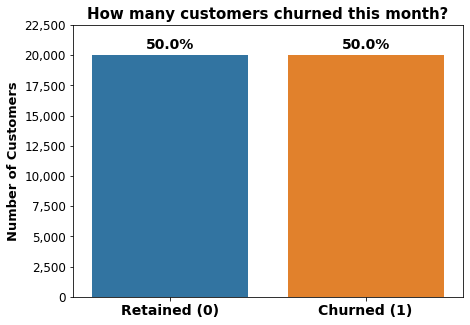

In [282]:
plt.figure(figsize=(7,5))
g = sns.countplot(x='Churn', data=data, hue='Churn', dodge=False)
g.get_legend().set_visible(False)
for p in g.patches:
    g.annotate(format(p.get_height()/len(data)*100)+'%',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center',
               va='center',
               xytext = (0, 10),
               textcoords = 'offset points',
               fontsize=14,
               fontweight='bold')
g.set(ylim=(0,22500))
g.set_xticklabels(['Retained (0)', 'Churned (1)'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(y_labels,
                  fontsize=12)
g.set_xlabel('')
g.set_ylabel('Number of Customers',
             fontsize=13,
             fontweight='bold')
g.set_title('How many customers churned this month?', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})
plt.savefig('Figures/churn_countplot', bbox_inches = "tight");

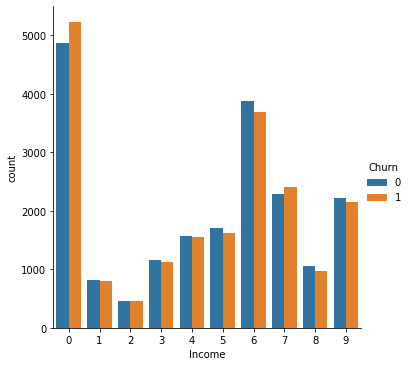

In [33]:
sns.catplot(x='Income', hue='Churn', data=data, kind='count');

In [36]:
check_unique('Marryyes', data)

,count,%
0,25387,63.470000
1,14613,36.530000


In [37]:
check_unique('Prizmrur', data)

,count,%
0,38008,95.020000
1,1992,4.980000


In [38]:
check_unique('Prizmub', data)

,count,%
0,27247,68.120000
1,12753,31.880000


In [39]:
check_unique('Prizmtwn', data)

,count,%
0,34028,85.070000
1,5972,14.930000


In [40]:
check_unique('Mailord', data)

,count,%
0,25711,64.280000
1,14289,35.720000


In [41]:
check_unique('Mailres', data)

,count,%
0,25103,62.760000
1,14897,37.240000


In [42]:
data['Csa'].value_counts()

NYCBRO917    1319
HOUHOU281    1153
DALDAL214    1143
NYCMAN917     920
APCFCH703     635
             ... 
INDCLO765       1
STLCPG573       1
PITSOM814       1
SEAJNC541       1
PITUNT412       1
Name: Csa, Length: 733, dtype: int64

In [45]:
## List of numerical columns
num_cols = ['Mou', 'Recchrge', 'Roam', 'Changem', 'Custcare',
            'Dropvce', 'Blckvce', 'Unansvce', 'Threeway', 'Outcalls',
            'Incalls', 'Peakvce', 'Callwait', 'Months', 'Eqpdays', 'Age1']

## Categorical column
cat_col = ['Csa']

## List of binary/ ordinal categorical columns
bin_rank_cols = ['Credita', 'Creditaa', 'Creditb', 'Creditc', 'Creditde',
                 'Creditgy', 'Creditz', 'Prizmrur', 'Prizmub', 'Prizmtwn', 
                 'Refurb', 'Occprof', 'Occstud', 'Occhmkr', 'Occret', 'Occself', 
                 'Refer', 'Marryyes', 'Mailord', 'Mailres', 'Income', 'Incmiss']

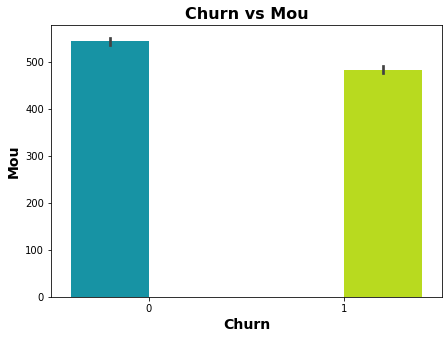

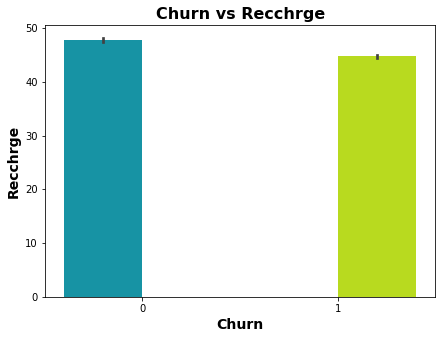

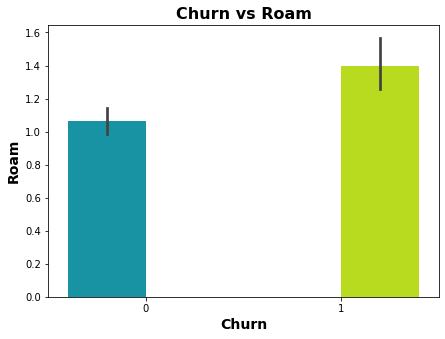

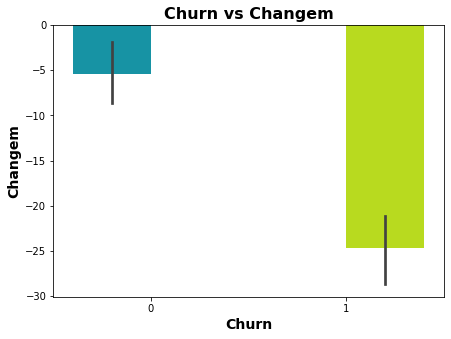

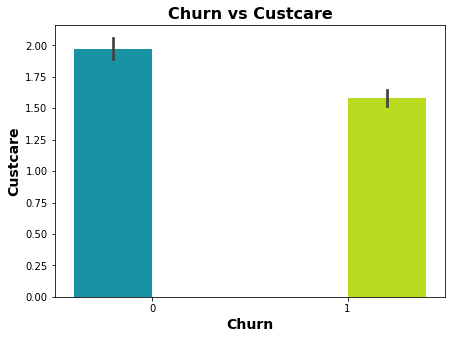

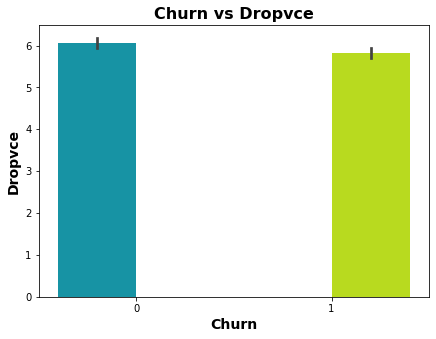

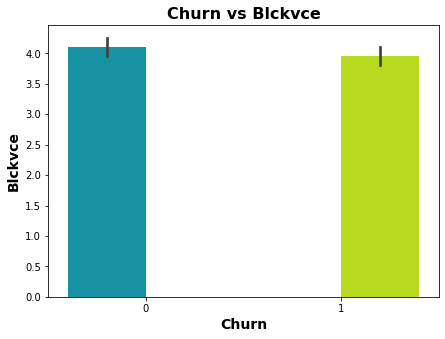

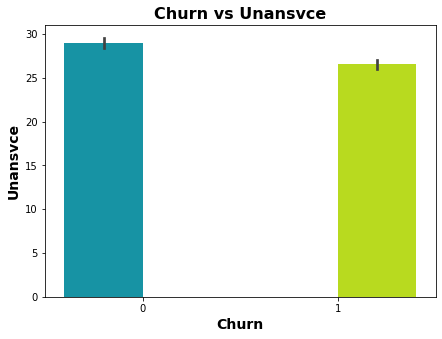

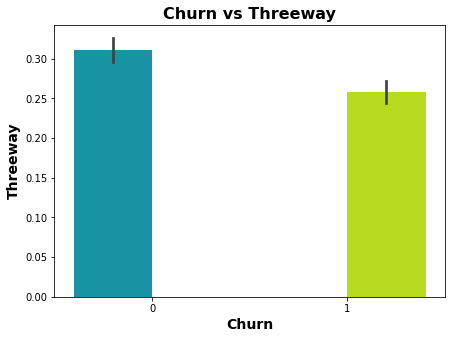

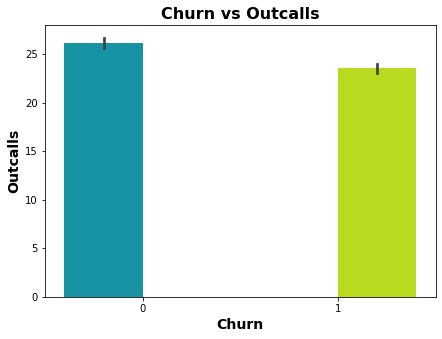

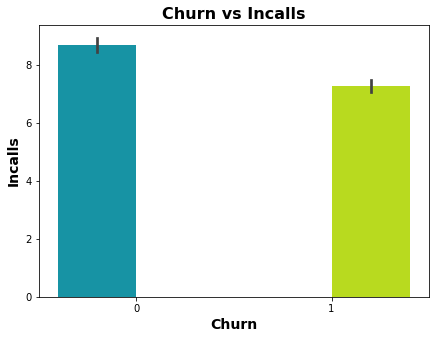

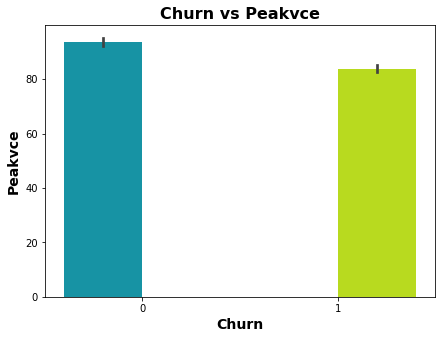

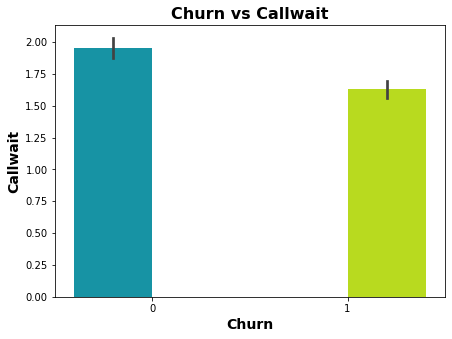

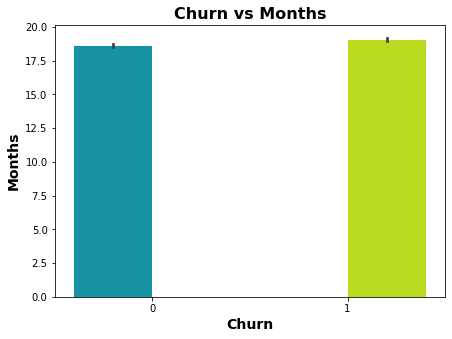

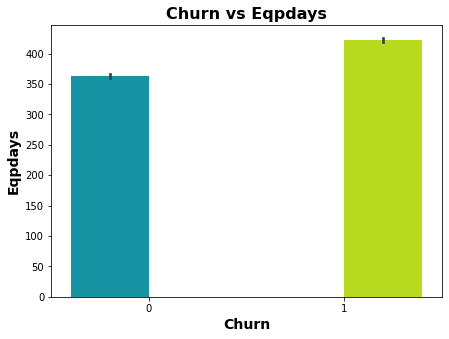

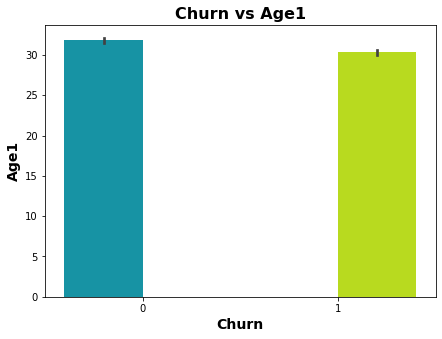

In [46]:
for col in data[num_cols]:
    plot_bar(col, data);

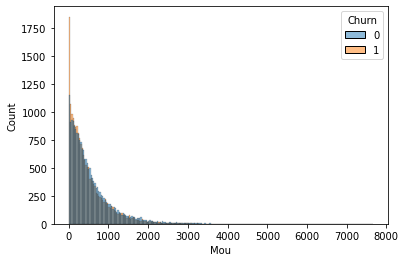

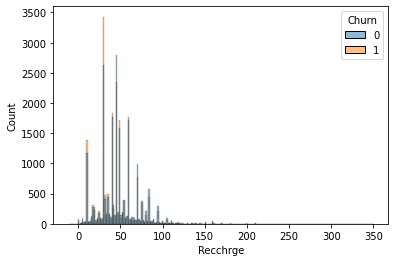

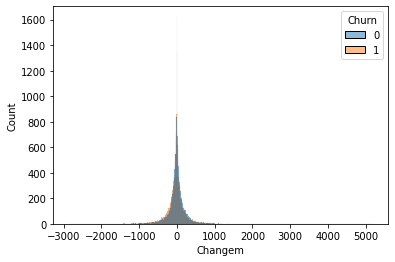

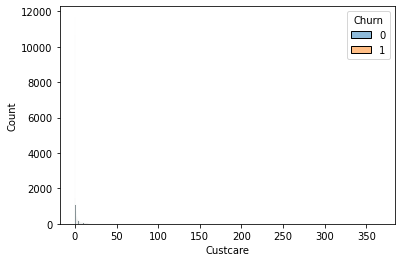

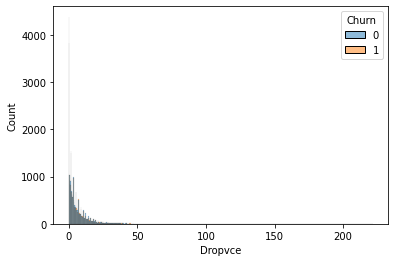

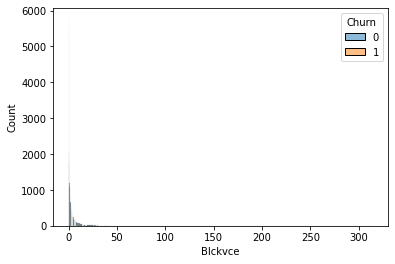

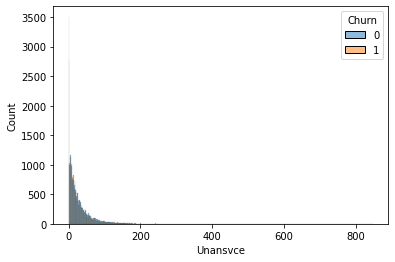

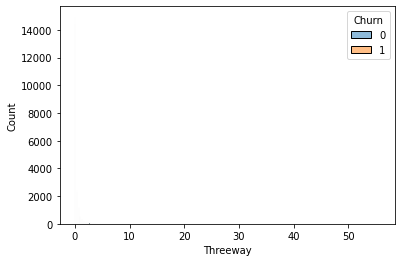

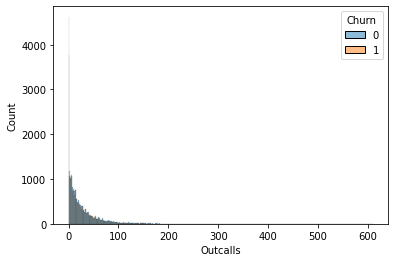

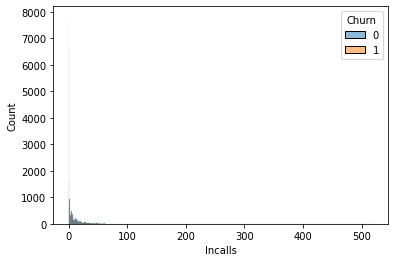

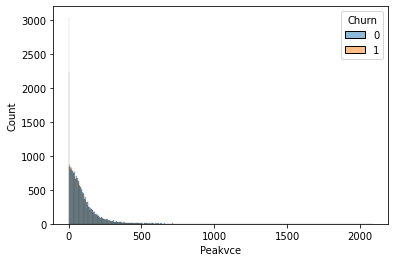

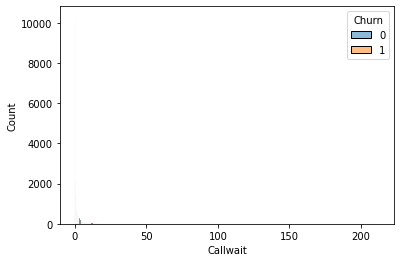

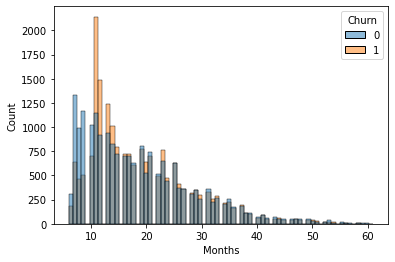

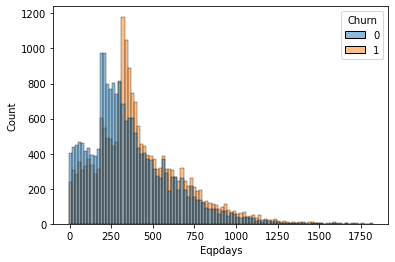

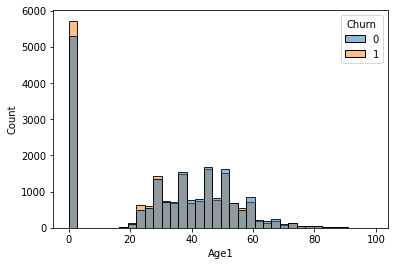

In [62]:
for col in data[num_cols]:
    if col != 'Roam':
        sns.histplot(data=data, x=col, hue='Churn')
        plt.show()

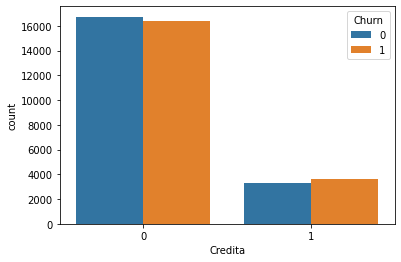

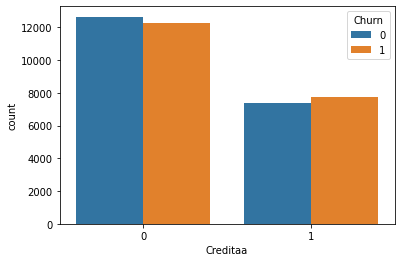

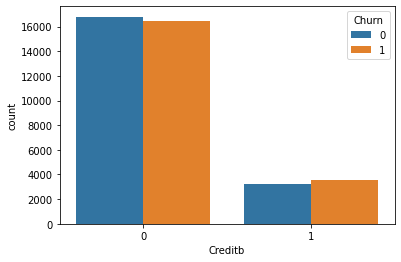

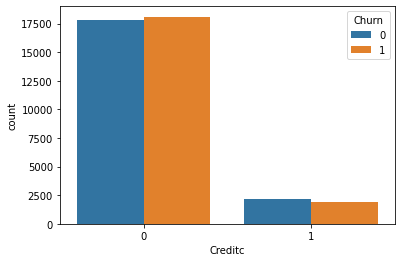

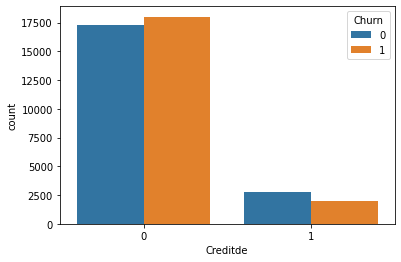

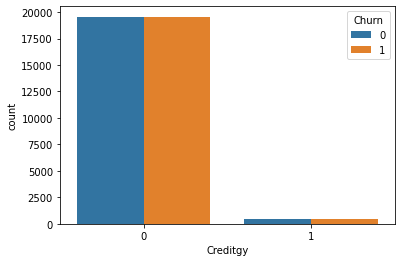

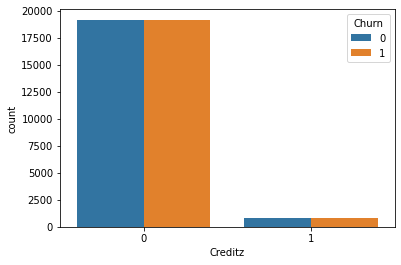

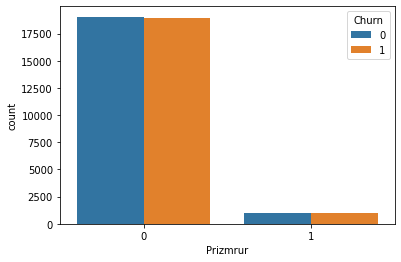

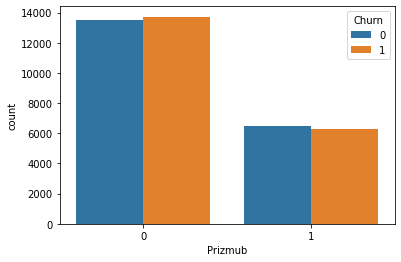

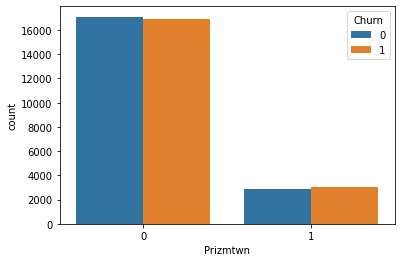

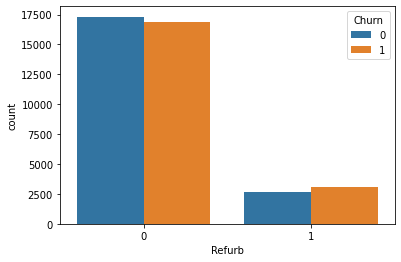

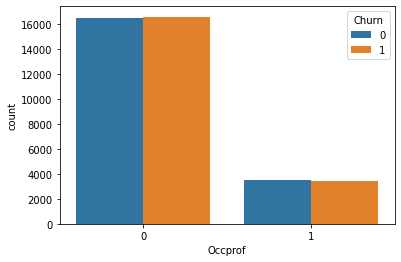

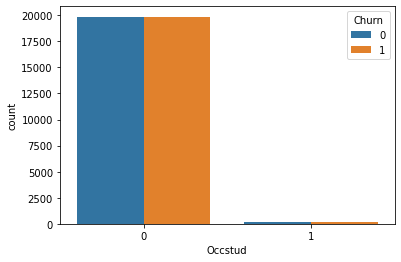

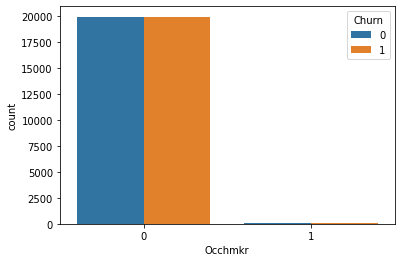

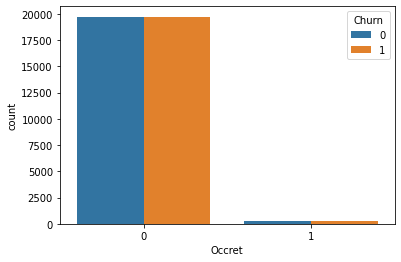

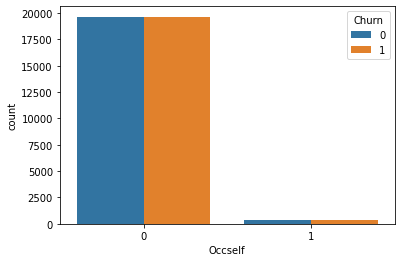

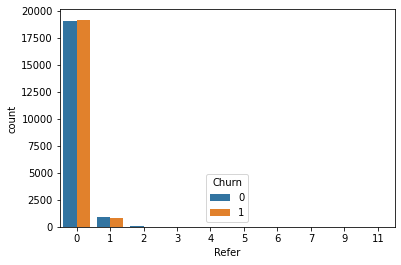

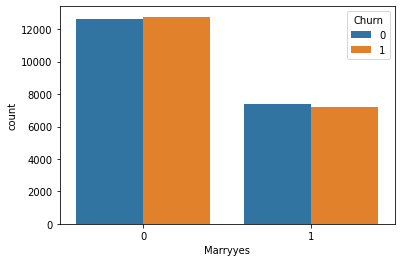

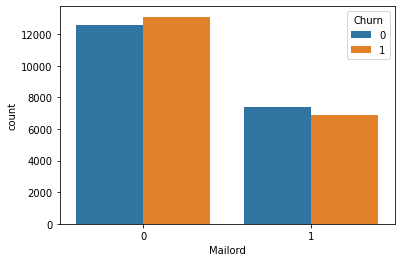

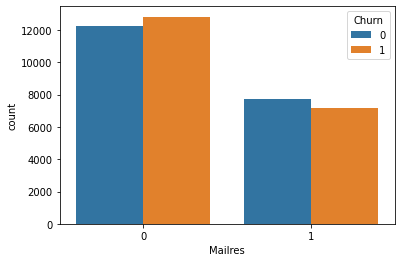

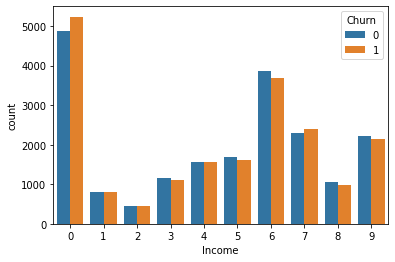

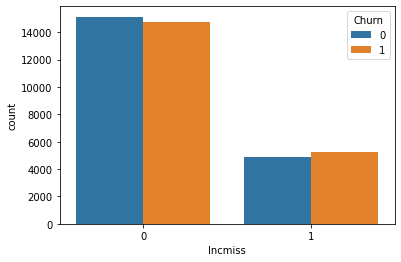

In [51]:
for col in data[bin_rank_cols]:
    sns.countplot(data=data, x=col, hue='Churn')
    plt.show()

In [52]:
## Income of 0 means the information is missing for that customer
check_unique('Income', data)

,count,%
0,10106,25.260000
6,7564,18.910000
7,4699,11.750000
9,4370,10.920000
5,3318,8.300000
4,3120,7.800000
3,2270,5.680000
8,2042,5.100000
1,1609,4.020000
2,902,2.260000


In [53]:
## Very little variation -- zero-inflated variable
check_unique('Refer', data)

,count,%
0,38250,95.620000
1,1654,4.140000
2,66,0.160000
3,16,0.040000
4,5,0.010000
5,3,0.010000
6,3,0.010000
7,1,0.000000
9,1,0.000000
11,1,0.000000


/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


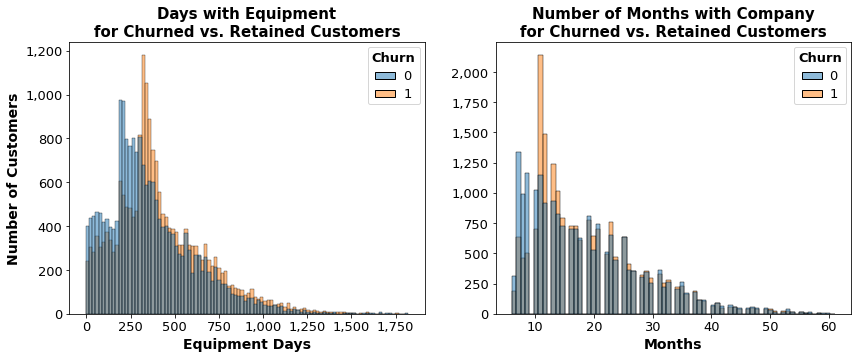

In [312]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))
sns.histplot(x='Eqpdays', hue='Churn', data=data, ax=ax1)

plt.setp(ax1.get_legend().get_texts(), fontsize='13')
plt.setp(ax1.get_legend().get_title(), fontsize='13', fontweight='bold')
x_labels = ['{:,.0f}'.format(x) for x in ax1.get_xticks()]
ax1.set_xticklabels(x_labels,
                    fontsize=13)
y_labels = ['{:,.0f}'.format(x) for x in ax1.get_yticks()]
ax1.set_yticklabels(y_labels,
                    fontsize=13)
ax1.set_xlabel('Equipment Days', 
               fontsize=14,
               fontweight='bold')
ax1.set_ylabel('Number of Customers',
               fontsize=14,
               fontweight='bold')
ax1.set_title('Days with Equipment\nfor Churned vs. Retained Customers', 
              fontdict={'fontsize':15,
                        'fontweight':'bold'});



sns.histplot(x='Months', hue='Churn', data=data, ax=ax2)

plt.setp(ax2.get_legend().get_texts(), fontsize='13')
plt.setp(ax2.get_legend().get_title(), fontsize='13', fontweight='bold')
x_labels = ['{:,.0f}'.format(x) for x in ax2.get_xticks()]
ax2.set_xticklabels(x_labels,
                    fontsize=13)
y_labels = ['{:,.0f}'.format(x) for x in ax2.get_yticks()]
ax2.set_yticklabels(y_labels,
                    fontsize=13)
ax2.set_xlabel('Months', 
               fontsize=14,
               fontweight='bold')
ax2.set_ylabel('')
ax2.set_title('Number of Months with Company\nfor Churned vs. Retained Customers', 
              fontdict={'fontsize':15,
                        'fontweight':'bold'})
plt.savefig('Figures/churn-timing-distrs', bbox_inches = "tight");

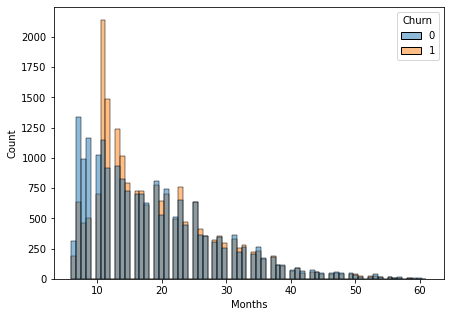

In [283]:
plt.figure(figsize=(7,5))
g = sns.histplot(x='Months', hue='Churn', data=data);

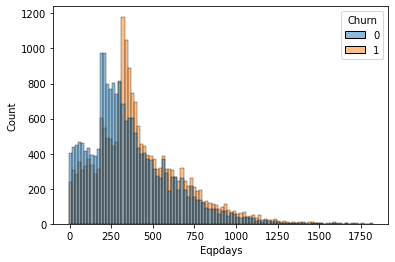

In [56]:
sns.histplot(x='Eqpdays', hue='Churn', data=data);

<AxesSubplot:xlabel='Age1', ylabel='Count'>

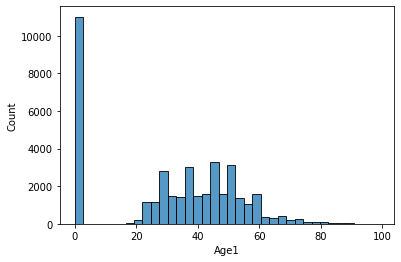

In [63]:
## Missing values for a customer's age are encoded as 0s.
  # More than 11,000 customers are missing this information,
    # so it doesn't make sense to impute this information
sns.histplot(data=data, x='Age1')

In [64]:
data['Age1'].value_counts()[0]

11022

## Scrub
Prepare data for analysis - deal with missing values, create new features

In [65]:
## Convert 'Refer' into a binary variable
data['Refery'] = np.where(data['Refer']==0, 0, 1)

In [66]:
data['Csa3'] = data['Csa'].str.slice(0,3)
check_unique('Csa3', data)

,count,%
NYC,4417,11.040000
LAX,2628,6.570000
SFR,2143,5.360000
APC,1914,4.780000
DAL,1807,4.520000
SAN,1713,4.280000
CHI,1609,4.020000
MIA,1580,3.950000
FLN,1559,3.900000
ATL,1430,3.580000


In [67]:
## Convert geographic region variable to first 3 letters of code
  ## representing larger regions
Csa3_vc = data['Csa3'].value_counts()

## Get list of regions with more than 1000 customers to reduce rare labels
Csa3_gt_1k = list(Csa3_vc.loc[Csa3_vc>1000].index)
Csa3_gt_1k

## Keep region codes with >1000 customers, group others into 'Other'
data['Csa3_grp'] = np.where(data['Csa3'].isin(Csa3_gt_1k), data['Csa3'], 'Other')

check_unique('Csa3_grp', data)

,count,%
Other,11560,28.900000
NYC,4417,11.040000
LAX,2628,6.570000
SFR,2143,5.360000
APC,1914,4.780000
DAL,1807,4.520000
SAN,1713,4.280000
CHI,1609,4.020000
MIA,1580,3.950000
FLN,1559,3.900000


In [69]:
## Create new DataFrame with predictors of interest
  ## and the target variable 'Churn'
model_data = data[['Mou', 'Recchrge', 'Roam', 'Changem', 'Custcare',
                   'Dropvce', 'Blckvce', 'Unansvce', 'Threeway', 'Outcalls',
                   'Incalls', 'Peakvce', 'Callwait', 'Months', 'Eqpdays',
                   'Credita', 'Creditaa', 'Creditb', 'Creditc', 'Creditde',
                   'Creditgy', 'Creditz', 'Prizmrur', 'Prizmub', 'Prizmtwn', 'Refurb', 
                   'Occprof', 'Occstud', 'Occhmkr', 'Occret', 'Occself', 
                   'Refery', 'Marryyes', 'Mailord', 'Mailres', 'Income', 'Incmiss', 
                   'Csa3_grp',
                   'Churn']]

In [248]:
model_data.head()

,Mou,Recchrge,Roam,Changem,Custcare,Dropvce,Blckvce,Unansvce,Threeway,Outcalls,Incalls,Peakvce,Callwait,Months,Eqpdays,Credita,Creditaa,Creditb,Creditc,Creditde,Creditgy,Creditz,Prizmrur,Prizmub,Prizmtwn,Refurb,Occprof,Occstud,Occhmkr,Occret,Occself,Refery,Marryyes,Mailord,Mailres,Income,Incmiss,Csa3_grp,Churn
0,219.25,22.50,0.0,-157.25,0.000000,0.666667,0.666667,6.333333,0.0,0.000000,0.000000,58.000000,0.333333,61,361,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,4,0,Other,1
1,10.25,16.99,0.0,-4.25,0.000000,0.333333,0.000000,2.666667,0.0,0.000000,0.000000,5.000000,0.000000,58,1504,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,5,0,Other,1
2,7.50,38.00,0.0,-1.50,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,1.333333,0.000000,60,1812,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,6,0,Other,0
3,570.50,71.98,0.0,38.50,8.666667,9.666667,0.666667,77.000000,0.0,14.666667,0.666667,97.333333,0.000000,57,434,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,Other,0
4,0.00,16.99,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,53,852,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,9,0,Other,1


In [70]:
model_data.describe()

,Mou,Recchrge,Roam,Changem,Custcare,Dropvce,Blckvce,Unansvce,Threeway,Outcalls,Incalls,Peakvce,Callwait,Months,Eqpdays,Credita,Creditaa,Creditb,Creditc,Creditde,Creditgy,Creditz,Prizmrur,Prizmub,Prizmtwn,Refurb,Occprof,Occstud,Occhmkr,Occret,Occself,Refery,Marryyes,Mailord,Mailres,Income,Incmiss,Churn
count,39859.00000,39859.000000,39859.000000,39639.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,513.97351,46.271960,1.228694,-15.006928,1.778229,5.940213,4.030525,27.771762,0.284450,24.836208,7.993717,88.685446,1.790696,18.831750,392.839500,0.171550,0.377100,0.167875,0.101700,0.11815,0.022200,0.041425,0.049800,0.318825,0.149300,0.144725,0.173550,0.007300,0.003025,0.014225,0.017850,0.043750,0.365325,0.357225,0.372425,4.330900,0.252650,0.500000
std,524.75989,23.714145,8.329852,259.646507,5.175107,8.880774,10.495103,38.250252,1.074865,34.764911,16.611850,102.933661,5.375079,9.624604,256.715982,0.376994,0.484666,0.373760,0.302257,0.32279,0.147335,0.199274,0.217534,0.466027,0.356388,0.351828,0.378727,0.085129,0.054917,0.118419,0.132408,0.204541,0.481527,0.479188,0.483457,3.144329,0.434537,0.500006
min,0.00000,-11.290000,0.000000,-2867.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.25000,30.000000,0.000000,-87.500000,0.000000,0.666667,0.000000,5.000000,0.000000,3.000000,0.000000,21.666667,0.000000,11.000000,212.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,356.50000,44.990000,0.000000,-6.250000,0.000000,3.000000,1.000000,16.000000,0.000000,13.000000,2.000000,61.000000,0.333333,17.000000,342.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.500000
75%,702.50000,59.990000,0.235000,63.000000,1.333333,7.666667,3.666667,36.000000,0.333333,33.000000,8.666667,118.666667,1.333333,24.000000,532.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000
max,7667.75000,349.572500,850.862500,5192.250000,365.666667,221.666667,314.666667,848.666667,55.666667,610.333333,519.333333,2090.666667,212.666667,61.000000,1823.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000


> - Only missing values from the first 4 columns. Will impute median value for each column as part of the preprocessing pipeline.

In [71]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mou       39859 non-null  float64
 1   Recchrge  39859 non-null  float64
 2   Roam      39859 non-null  float64
 3   Changem   39639 non-null  float64
 4   Custcare  40000 non-null  float64
 5   Dropvce   40000 non-null  float64
 6   Blckvce   40000 non-null  float64
 7   Unansvce  40000 non-null  float64
 8   Threeway  40000 non-null  float64
 9   Outcalls  40000 non-null  float64
 10  Incalls   40000 non-null  float64
 11  Peakvce   40000 non-null  float64
 12  Callwait  40000 non-null  float64
 13  Months    40000 non-null  int64  
 14  Eqpdays   40000 non-null  int64  
 15  Credita   40000 non-null  int64  
 16  Creditaa  40000 non-null  int64  
 17  Creditb   40000 non-null  int64  
 18  Creditc   40000 non-null  int64  
 19  Creditde  40000 non-null  int64  
 20  Creditgy  40000 non-null  in

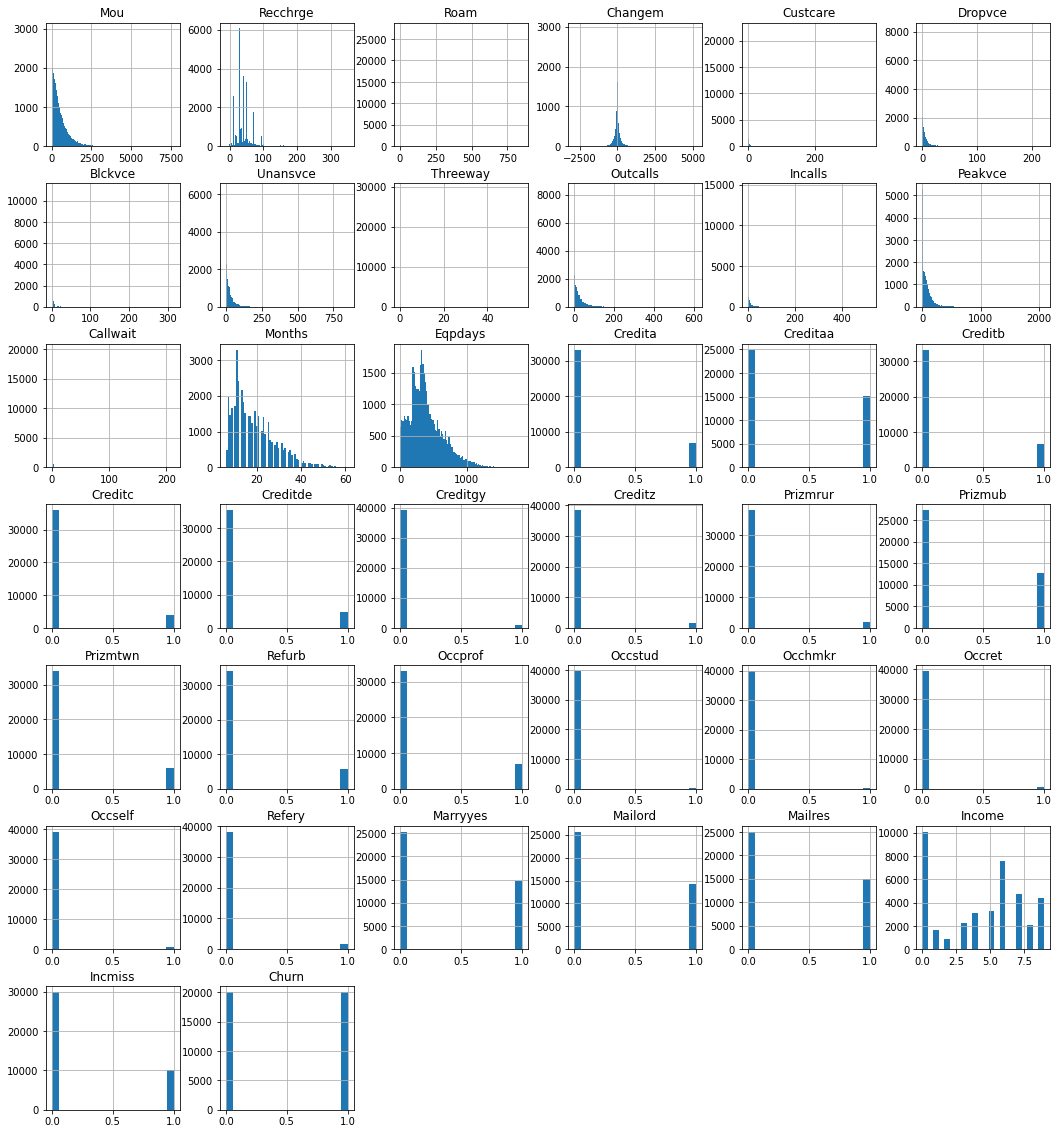

In [72]:
## Check distributions of all the variables and target
model_data.hist(figsize=(18, 20), bins='auto');

## Model

In [75]:
## Import necessary functions/methods/classes for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

## Import classes necessary for building preprocessing pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

### Split the Data into a Training and Testing Set

Using 75% of our remaining total 38,924 observations (customers) to train the model and save the other 25% to test how well the model does at predicting on new data.

In [ ]:
## Read in dataset from csv file
model_data = pd.read_csv('Data/model_data.csv')

## Define target variable
target = 'Churn'

## Separate features (X) and target (y) for train-test split
X = model_data.drop(columns=[target], axis=1).copy()
y = model_data[target].copy()

## Define random seed to use for train-test-split and 
 ## classifiers for reproducibility
random_seed = 319

## Split the data into training and test sets prior to preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=random_seed)

In [ ]:
## Define single categorical column
cat_col = ['Csa3_grp']


## List of numerical columns to be transformed
num_cols = ['Mou', 'Recchrge', 'Roam', 'Changem', 'Custcare',
            'Dropvce', 'Blckvce', 'Unansvce', 'Threeway', 'Outcalls',
            'Incalls', 'Peakvce', 'Callwait', 'Months', 'Eqpdays']


## List of remaining columns
rem_cols = ['Credita', 'Creditaa', 'Creditb', 'Creditc', 'Creditde',
            'Creditgy', 'Creditz', 'Prizmrur', 'Prizmub', 'Prizmtwn', 'Refurb', 
            'Occprof', 'Occstud', 'Occhmkr', 'Occret', 'Occself', 
            'Refery', 'Marryyes', 'Mailord', 'Mailres', 'Income', 'Incmiss']


## Create a pipeline for transforming categorical columns
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder(handle_unknown='error', 
                                                              sparse=False))])

## Create a pipeline for transforming numerical columns
num_transformer = Pipeline(steps = [('impute', SimpleImputer(strategy='median')),
                                    ('stdrd', StandardScaler())])


preprocessing = ColumnTransformer(transformers=[('cat', cat_transformer, cat_col),
                                                ('num', num_transformer, num_cols)],
                                  remainder='passthrough')

In [85]:
## Preprocess training and test data
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

## Get the feature names in the order they appear in preprocessed data
feature_names = preprocessing.named_transformers_['cat'].named_steps['encoder'].get_feature_names(cat_col)
feature_names = np.r_[feature_names, num_cols, rem_cols]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.15611567e+00,  5.73961833e-01,  3.78366819e-01,
       -1.51693758e+00,  2.09584695e+00,  1.04850831e+00, -3.20295205e-01,
        3.37650527e-02,  6.72798325e-01,  1.11060221e+00, -4.01756997e-04,
        5.87783642e-02,  4.09617205e-01, -8.14839914e-01, -3.42358402e-01,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        6.00000000e+00,  

### Logistic Regression

In [87]:
## Instantiate logistic regression classifier
logreg = LogisticRegression(random_state=random_seed,
                            n_jobs=-1)

## Fit log reg classifier to training data
logreg.fit(X_train_tf, y_train)

LogisticRegression(n_jobs=-1, random_state=319)

-------------------------------------------------------
Classification Report: 
-------------------------------------------------------
              precision    recall  f1-score   support

      Retain       0.57      0.55      0.56      4983
       Churn       0.56      0.58      0.57      5017

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000

-------------------------------------------------------
-------------------------------------------------------




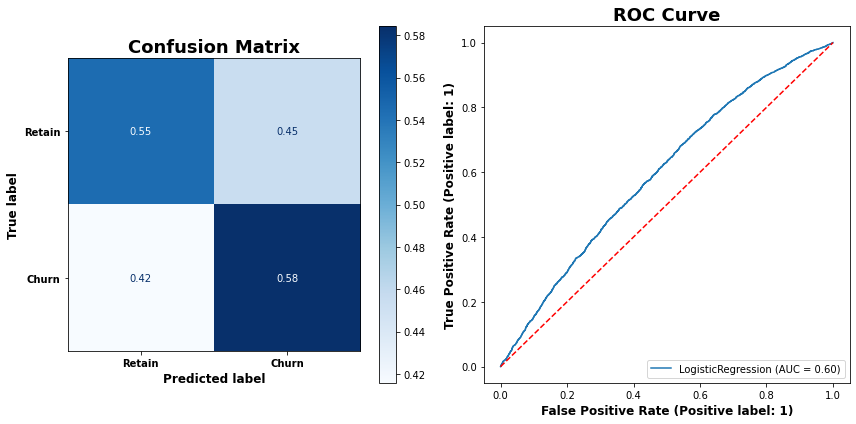

In [88]:
eval_clf(logreg, X_test_tf, y_test);

### Random Forest Classifier

-------------------------------------------------------
Classification Report: 
-------------------------------------------------------
              precision    recall  f1-score   support

      Retain       0.60      0.60      0.60      4983
       Churn       0.60      0.60      0.60      5017

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000

-------------------------------------------------------
-------------------------------------------------------




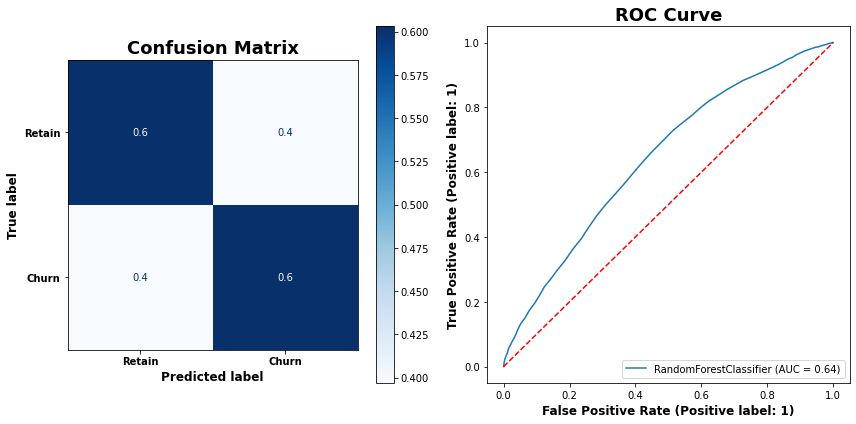

In [250]:
## Instantiate random forest classifier
rf = RandomForestClassifier(random_state=random_seed,
                            n_jobs=-1)

## Fit random forest classifier to training data
rf.fit(X_train_tf, y_train)

## Evaluate how the model performs on the test set
eval_clf(rf, X_test_tf, y_test, save=True, fig_name='confusion-matrix-ROC');

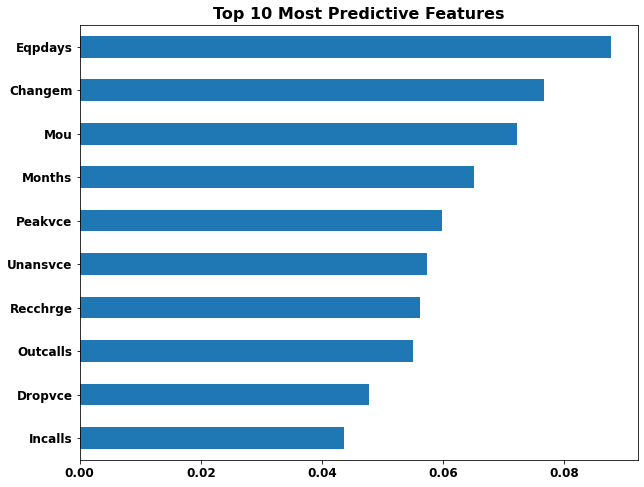

In [253]:
## Obtain and sort feature importances from fitted model
feature_importances = (rf.feature_importances_)
sorted_idx = feature_importances.argsort()
importance = pd.Series(feature_importances, index=feature_names)

## Plot top 10 most predictive features
plt.figure(figsize=(10,8))
fig = importance.sort_values().tail(10).plot(kind='barh')
fig.set_title('Top 10 Most Predictive Features',
              fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

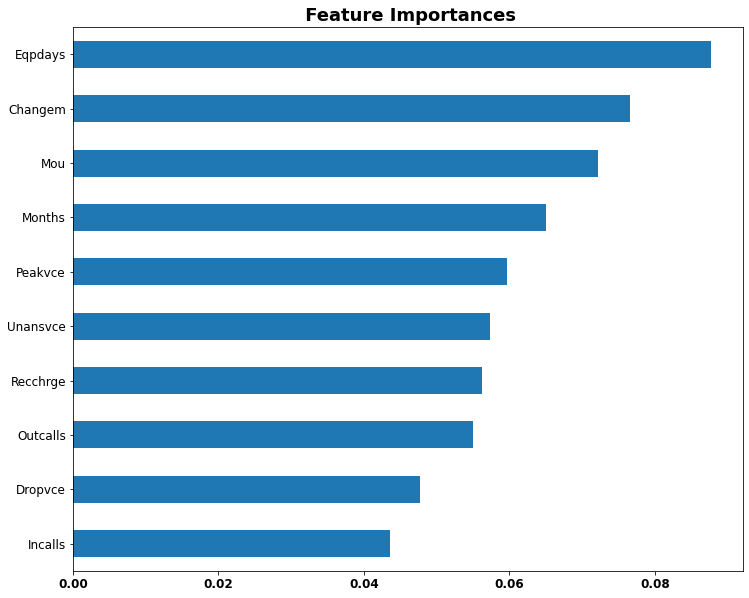

In [94]:
plot_feat_importance(rf, feature_names);

In [95]:
## Check the order of the classes
rf.classes_

array([0, 1])

In [98]:
## Get a Pandas Series that contains the predicted likelihood
  ## (probability) that each customer in the test set would churn
churn_probs = []
for obsv in rf.predict_proba(X_test_tf):
    churn_probs.append(obsv[1])
churn_probs = pd.Series(data=churn_probs)

## Reset the index of y_test set
y_test_ri = y_test.reset_index(drop=True)

## Create a new DataFrame that includes our predictors (X) from the
  ## test set, our target (y) from the test set, and the probability
  ## of churn output by the model for each customer 
prob_df = X_test.copy()
prob_df['Churn'] = y_test_ri
prob_df['churn_prob'] = churn_probs

## Split the test set into deciles based on predicted churn probability
prob_df['decile_rank'] = pd.qcut(prob_df['churn_prob'],
                                 10, labels=False)

0       0.70
1       0.63
2       0.52
3       0.38
4       0.82
        ... 
9995    0.58
9996    0.31
9997    0.65
9998    0.70
9999    0.56
Length: 10000, dtype: float64

In [112]:
## Slice out highest churn probability decile
high_prob_dec = prob_df.loc[prob_df['decile_rank']==9]
high_prob_dec.head()

,Mou,Recchrge,Roam,Changem,Custcare,Dropvce,Blckvce,Unansvce,Threeway,Outcalls,Incalls,Peakvce,Callwait,Months,Eqpdays,Credita,Creditaa,Creditb,Creditc,Creditde,Creditgy,Creditz,Prizmrur,Prizmub,Prizmtwn,Refurb,Occprof,Occstud,Occhmkr,Occret,Occself,Refery,Marryyes,Mailord,Mailres,Income,Incmiss,Csa3_grp,Churn,churn_prob,decile_rank
0,498.25,39.6575,0.0,6.75,18.0,6.0,2.0,44.0,2.666667,2.333333,0.0,75.666667,0.0,11,334,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,Other,1,0.70,9
4,0.00,23.2225,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,9,253,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,Other,0,0.82,9
10,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,55,1021,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,9,0,NEV,0,0.70,9
24,0.00,29.9900,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,27,817,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,6,0,APC,1,0.79,9
27,0.00,16.9900,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.0,30,908,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,5,0,LAX,0,0.73,9


In [113]:
high_prob_dec.describe()

,Mou,Recchrge,Roam,Changem,Custcare,Dropvce,Blckvce,Unansvce,Threeway,Outcalls,Incalls,Peakvce,Callwait,Months,Eqpdays,Credita,Creditaa,Creditb,Creditc,Creditde,Creditgy,Creditz,Prizmrur,Prizmub,Prizmtwn,Refurb,Occprof,Occstud,Occhmkr,Occret,Occself,Refery,Marryyes,Mailord,Mailres,Income,Incmiss,Churn,churn_prob,decile_rank
count,916.000000,916.000000,916.000000,903.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.0
mean,269.835244,37.663624,1.260000,-62.409653,0.490492,3.617869,1.886616,15.060280,0.073197,10.731252,2.639756,42.803373,0.529961,18.305705,487.645856,0.184069,0.413348,0.187298,0.089343,0.059203,0.013994,0.052745,0.065662,0.246502,0.163617,0.114101,0.125942,0.004306,0.002153,0.007535,0.005382,0.022605,0.298170,0.260495,0.273412,3.786868,0.332616,0.719053,0.731959,9.0
std,319.598856,18.967875,7.592558,178.484310,1.647864,6.999009,4.900525,24.400086,0.245945,17.286129,6.648601,55.193189,1.390768,9.213885,250.884200,0.387749,0.492699,0.390361,0.285392,0.236132,0.117527,0.223644,0.247824,0.431206,0.370127,0.318105,0.331963,0.065512,0.046374,0.086523,0.073205,0.148720,0.457701,0.439141,0.445951,3.219318,0.471404,0.449704,0.062073,0.0
min,0.000000,0.000000,0.000000,-1085.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.670000,9.0
25%,22.437500,29.990000,0.000000,-125.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680000,9.0
50%,181.750000,39.990000,0.000000,-17.250000,0.000000,1.333333,0.333333,6.333333,0.000000,2.333333,0.000000,22.666667,0.000000,13.000000,376.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.710000,9.0
75%,385.500000,45.230625,0.097500,0.000000,0.000000,5.000000,1.666667,21.000000,0.000000,14.333333,1.666667,68.000000,0.333333,24.000000,616.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,0.760000,9.0
max,2480.500000,157.490000,139.782500,1039.250000,19.333333,145.333333,67.666667,334.666667,2.666667,113.000000,61.333333,487.666667,13.666667,55.000000,1663.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,0.960000,9.0


In [114]:
high_prob_dec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 9998
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mou          916 non-null    float64
 1   Recchrge     916 non-null    float64
 2   Roam         916 non-null    float64
 3   Changem      903 non-null    float64
 4   Custcare     929 non-null    float64
 5   Dropvce      929 non-null    float64
 6   Blckvce      929 non-null    float64
 7   Unansvce     929 non-null    float64
 8   Threeway     929 non-null    float64
 9   Outcalls     929 non-null    float64
 10  Incalls      929 non-null    float64
 11  Peakvce      929 non-null    float64
 12  Callwait     929 non-null    float64
 13  Months       929 non-null    int64  
 14  Eqpdays      929 non-null    int64  
 15  Credita      929 non-null    int64  
 16  Creditaa     929 non-null    int64  
 17  Creditb      929 non-null    int64  
 18  Creditc      929 non-null    int64  
 19  Creditd

In [147]:
check_unique('Churn', high_prob_dec)

,count,%
1,668,71.910000
0,261,28.090000


/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


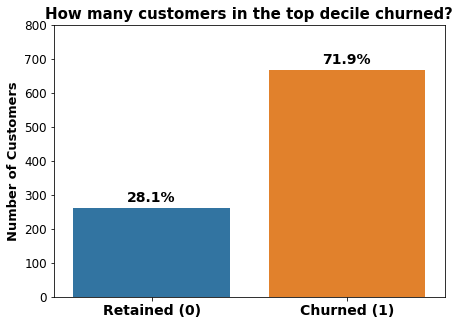

In [281]:
plt.figure(figsize=(7,5))
g = sns.countplot(x='Churn', data=high_prob_dec, hue='Churn', dodge=False)
g.get_legend().set_visible(False)
for p in g.patches:
    g.annotate((f"{p.get_height()/len(high_prob_dec)*100:.1f}"+'%'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext = (0, 10),
        textcoords = 'offset points',
        fontsize=14,
                fontweight='bold')
g.set(ylim=(0,800))
g.set_xticklabels(['Retained (0)', 'Churned (1)'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(y_labels,
                  fontsize=12)
g.set_xlabel('')
g.set_ylabel('Number of Customers',
             fontsize=13,
             fontweight='bold')
g.set_title('How many customers in the top decile churned?', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})
plt.savefig('Figures/top_dec_countplot', bbox_inches = "tight");

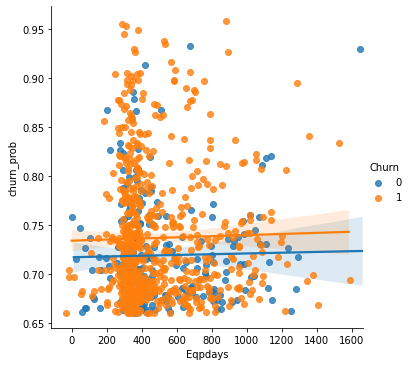

In [134]:
sns.lmplot(data=high_prob_dec, x='Eqpdays', y='churn_prob', hue='Churn',
           x_jitter=50, y_jitter=.01)

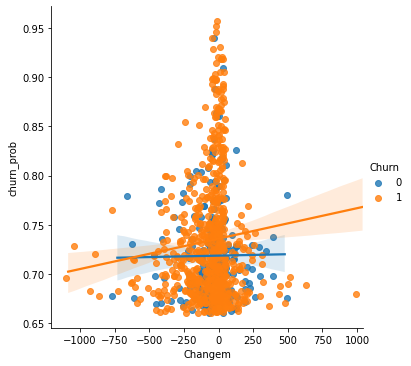

In [137]:
sns.lmplot(data=high_prob_dec, x='Changem', y='churn_prob', hue='Churn',
           x_jitter=50, y_jitter=.01)

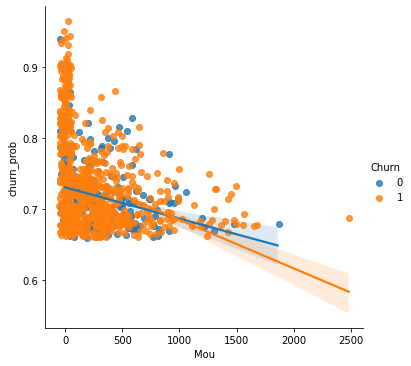

In [138]:
sns.lmplot(data=high_prob_dec, x='Mou', y='churn_prob', hue='Churn',
           x_jitter=50, y_jitter=.01)

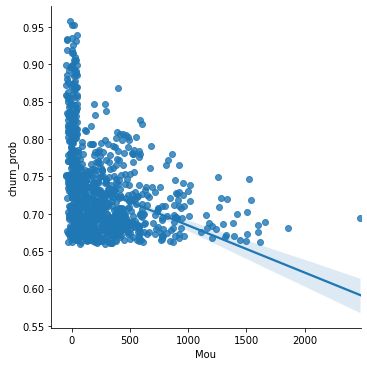

In [265]:
sns.lmplot(data=high_prob_dec, x='Mou', y='churn_prob',
           x_jitter=50, y_jitter=.01)

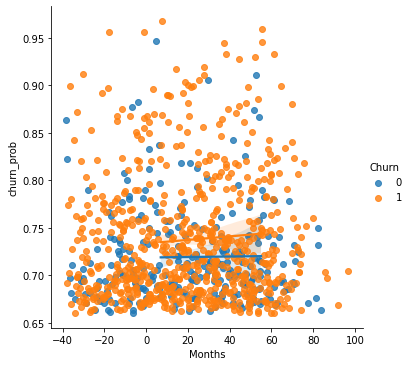

In [139]:
sns.lmplot(data=high_prob_dec, x='Months', y='churn_prob', hue='Churn',
           x_jitter=50, y_jitter=.01)

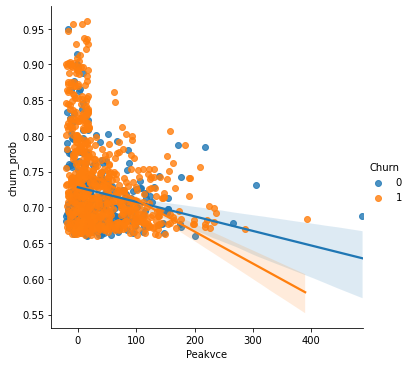

In [141]:
sns.lmplot(data=high_prob_dec, x='Peakvce', y='churn_prob', hue='Churn',
           x_jitter=20, y_jitter=.01)

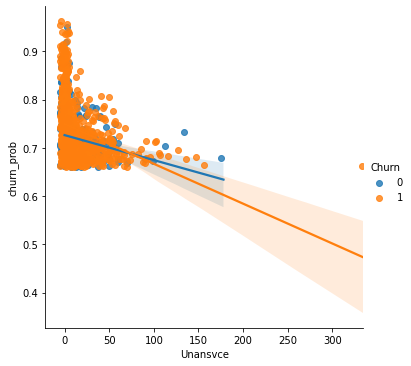

In [143]:
sns.lmplot(data=high_prob_dec, x='Unansvce', y='churn_prob', hue='Churn',
           x_jitter=5, y_jitter=.01)

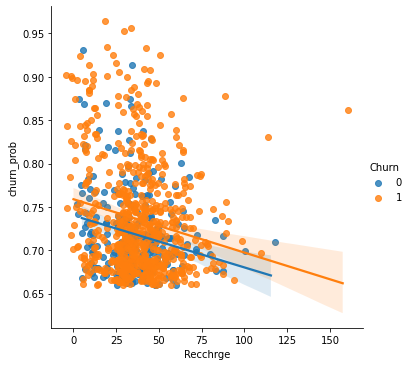

In [144]:
sns.lmplot(data=high_prob_dec, x='Recchrge', y='churn_prob', hue='Churn',
           x_jitter=5, y_jitter=.01)

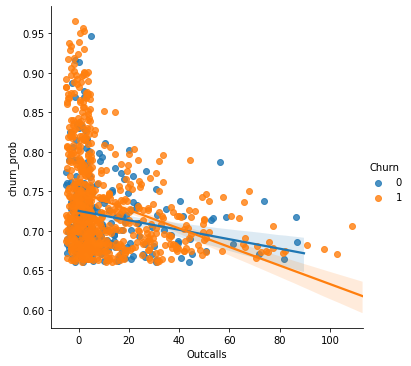

In [149]:
sns.lmplot(data=high_prob_dec, x='Outcalls', y='churn_prob', hue='Churn',
           x_jitter=5, y_jitter=.01)

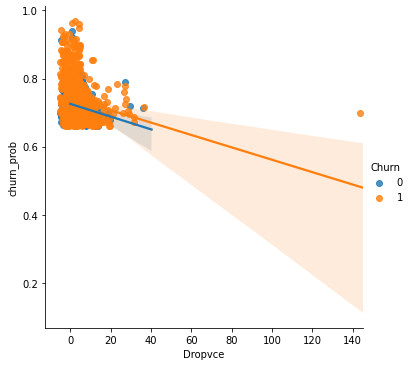

In [150]:
sns.lmplot(data=high_prob_dec, x='Dropvce', y='churn_prob', hue='Churn',
           x_jitter=5, y_jitter=.01)

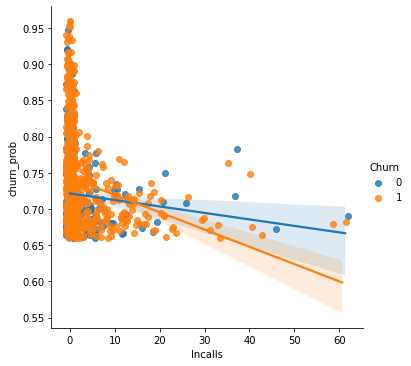

In [152]:
sns.lmplot(data=high_prob_dec, x='Incalls', y='churn_prob', hue='Churn',
           x_jitter=1, y_jitter=.01)

In [153]:
## Create binary indicator, in highest probability decile or not
prob_df['top_dec'] = np.where(prob_df['decile_rank']==9, 1, 0)
prob_df.head()

,Mou,Recchrge,Roam,Changem,Custcare,Dropvce,Blckvce,Unansvce,Threeway,Outcalls,Incalls,Peakvce,Callwait,Months,Eqpdays,Credita,Creditaa,Creditb,Creditc,Creditde,Creditgy,Creditz,Prizmrur,Prizmub,Prizmtwn,Refurb,Occprof,Occstud,Occhmkr,Occret,Occself,Refery,Marryyes,Mailord,Mailres,Income,Incmiss,Csa3_grp,Churn,churn_prob,decile_rank,top_dec
0,498.25,39.6575,0.00,6.75,18.000000,6.000000,2.000000,44.000000,2.666667,2.333333,0.000000,75.666667,0.000000,11,334,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,Other,1,0.70,9,1
1,590.25,10.0000,0.00,383.75,4.666667,12.666667,5.000000,20.666667,0.000000,38.000000,26.000000,86.333333,1.333333,13,389,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0,Other,1,0.63,8,0
2,240.00,59.9900,0.78,90.00,0.000000,3.666667,1.333333,15.000000,0.000000,13.666667,0.333333,62.333333,0.333333,11,348,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,6,0,Other,0,0.52,5,0
3,667.00,69.9900,0.00,-150.00,1.333333,16.666667,6.000000,44.666667,0.000000,65.666667,17.666667,130.000000,1.666667,36,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,MIA,0,0.38,1,0
4,0.00,23.2225,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,253,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,Other,0,0.82,9,1


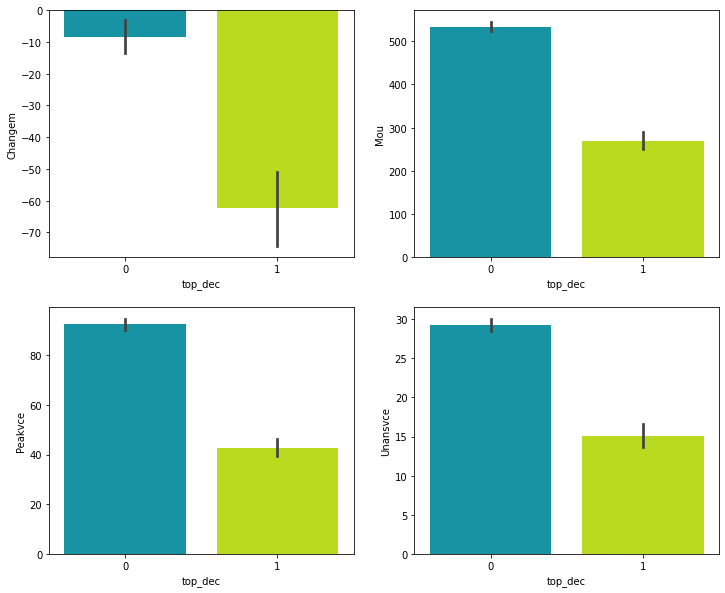

In [326]:
top_non_time_predictors = ['Changem', 'Mou', 'Peakvce', 'Unansvce']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

for ax, pred in list(zip(axes.flatten(), top_non_time_predictors)):
    sns.barplot(data=prob_df, x='top_dec', y=pred, ax=ax, palette='nipy_spectral')

<AxesSubplot:xlabel='top_dec', ylabel='Eqpdays'>

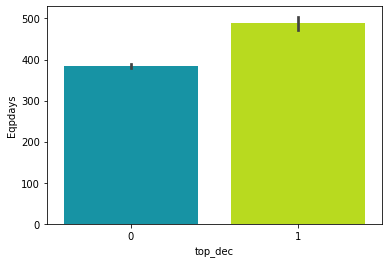

In [313]:
sns.barplot(data=prob_df, x='top_dec', y='Eqpdays', palette='nipy_spectral')

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


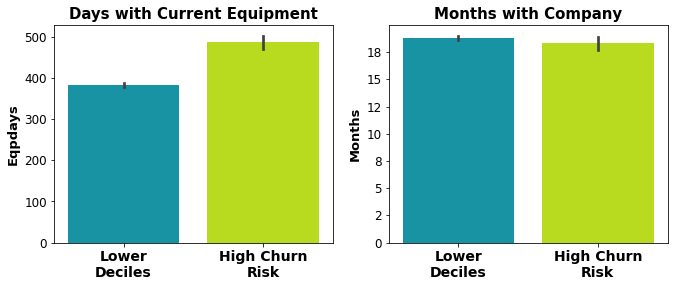

In [360]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(11,4))
# fig.tight_layout(w_pad=5)
sns.barplot(data=prob_df, x='top_dec', y='Eqpdays', palette='nipy_spectral', ax=ax1)
ax1.set_xticklabels(['Lower\nDeciles', 'High Churn\nRisk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax1.get_yticks()]
ax1.set_yticklabels(y_labels,
                  fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('Eqpdays',
             fontsize=13,
             fontweight='bold')
ax1.set_title('Days with Current Equipment', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})

sns.barplot(data=prob_df, x='top_dec', y='Months', palette='nipy_spectral', ax=ax2)
ax2.set_xticklabels(['Lower\nDeciles', 'High Churn\nRisk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax2.get_yticks()]
ax2.set_yticklabels(y_labels,
                  fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('Months',
             fontsize=13,
             fontweight='bold')
ax2.set_title('Months with Company', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})

plt.savefig('Figures/churn_timing_bar', bbox_inches = "tight");

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


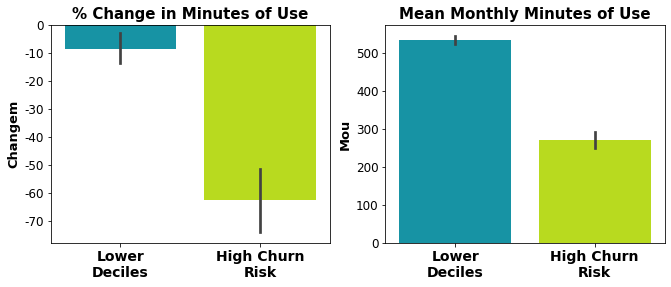

In [359]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(11,4))
# fig.tight_layout(w_pad=5)
sns.barplot(data=prob_df, x='top_dec', y='Changem', palette='nipy_spectral', ax=ax1)
ax1.set_xticklabels(['Lower\nDeciles', 'High Churn\nRisk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax1.get_yticks()]
ax1.set_yticklabels(y_labels,
                  fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('Changem',
             fontsize=13,
             fontweight='bold')
ax1.set_title('% Change in Minutes of Use', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})

sns.barplot(data=prob_df, x='top_dec', y='Mou', palette='nipy_spectral', ax=ax2)
ax2.set_xticklabels(['Lower\nDeciles', 'High Churn\nRisk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax2.get_yticks()]
ax2.set_yticklabels(y_labels,
                  fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('Mou',
             fontsize=13,
             fontweight='bold')
ax2.set_title('Mean Monthly Minutes of Use', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})

plt.savefig('Figures/low_call_vol_bar', bbox_inches = "tight");

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


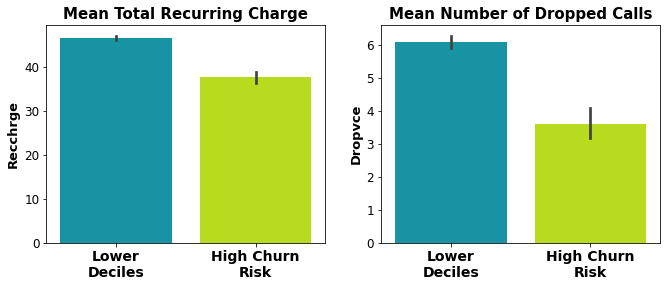

In [361]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(11,4))
# fig.tight_layout(w_pad=5)
sns.barplot(data=prob_df, x='top_dec', y='Recchrge', palette='nipy_spectral', ax=ax1)
ax1.set_xticklabels(['Lower\nDeciles', 'High Churn\nRisk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax1.get_yticks()]
ax1.set_yticklabels(y_labels,
                  fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('Recchrge',
             fontsize=13,
             fontweight='bold')
ax1.set_title('Mean Total Recurring Charge', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})

sns.barplot(data=prob_df, x='top_dec', y='Dropvce', palette='nipy_spectral', ax=ax2)
ax2.set_xticklabels(['Lower\nDeciles', 'High Churn\nRisk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax2.get_yticks()]
ax2.set_yticklabels(y_labels,
                  fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('Dropvce',
             fontsize=13,
             fontweight='bold')
ax2.set_title('Mean Number of Dropped Calls', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})

plt.savefig('Figures/chrge_drop_bar', bbox_inches = "tight");

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


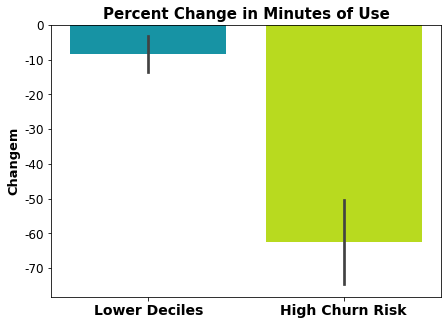

In [329]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=prob_df, x='top_dec', y='Changem', palette='nipy_spectral')
ax.set_xticklabels(['Lower Deciles', 'High Churn Risk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(y_labels,
                  fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Changem',
             fontsize=13,
             fontweight='bold')
ax.set_title('Percent Change in Minutes of Use', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})
plt.savefig('Figures/Changem_bar', bbox_inches = "tight");

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


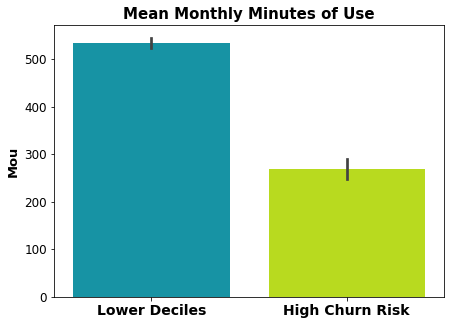

In [330]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=prob_df, x='top_dec', y='Mou', palette='nipy_spectral')
ax.set_xticklabels(['Lower Deciles', 'High Churn Risk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(y_labels,
                  fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Mou',
             fontsize=13,
             fontweight='bold')
ax.set_title('Mean Monthly Minutes of Use', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})
plt.savefig('Figures/Mou_bar', bbox_inches = "tight");

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


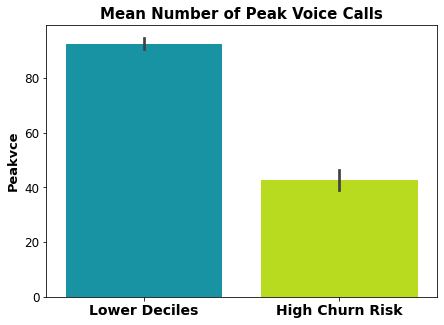

In [331]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=prob_df, x='top_dec', y='Peakvce', palette='nipy_spectral')
ax.set_xticklabels(['Lower Deciles', 'High Churn Risk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(y_labels,
                  fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Peakvce',
             fontsize=13,
             fontweight='bold')
ax.set_title('Mean Number of Peak Voice Calls', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})
plt.savefig('Figures/Peakvce_bar', bbox_inches = "tight");

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


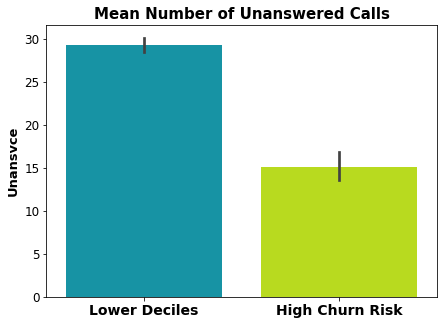

In [333]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=prob_df, x='top_dec', y='Unansvce', palette='nipy_spectral')
ax.set_xticklabels(['Lower Deciles', 'High Churn Risk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(y_labels,
                  fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Unansvce',
             fontsize=13,
             fontweight='bold')
ax.set_title('Mean Number of Unanswered Calls', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})
plt.savefig('Figures/Unansvce_bar', bbox_inches = "tight");

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


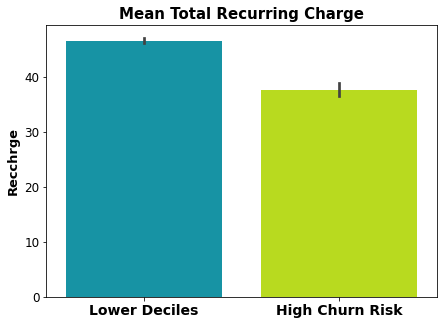

In [334]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=prob_df, x='top_dec', y='Recchrge', palette='nipy_spectral')
ax.set_xticklabels(['Lower Deciles', 'High Churn Risk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(y_labels,
                  fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Recchrge',
             fontsize=13,
             fontweight='bold')
ax.set_title('Mean Total Recurring Charge', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})
plt.savefig('Figures/Recchrge_bar', bbox_inches = "tight");

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


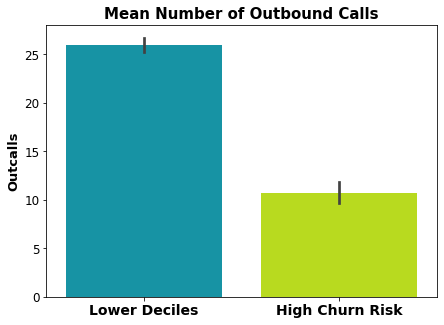

In [336]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=prob_df, x='top_dec', y='Outcalls', palette='nipy_spectral')
ax.set_xticklabels(['Lower Deciles', 'High Churn Risk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(y_labels,
                  fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Outcalls',
             fontsize=13,
             fontweight='bold')
ax.set_title('Mean Number of Outbound Calls', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})
plt.savefig('Figures/Outcalls_bar', bbox_inches = "tight");

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


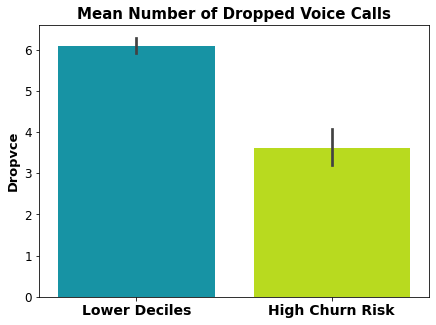

In [335]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=prob_df, x='top_dec', y='Dropvce', palette='nipy_spectral')
ax.set_xticklabels(['Lower Deciles', 'High Churn Risk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(y_labels,
                  fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Dropvce',
             fontsize=13,
             fontweight='bold')
ax.set_title('Mean Number of Dropped Voice Calls', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})
plt.savefig('Figures/Dropvce_bar', bbox_inches = "tight");

/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


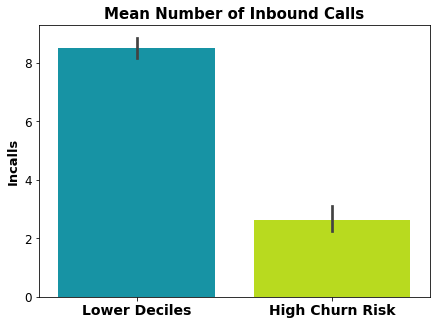

In [337]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=prob_df, x='top_dec', y='Incalls', palette='nipy_spectral')
ax.set_xticklabels(['Lower Deciles', 'High Churn Risk'], 
                  fontsize=14,
                  fontweight='bold')
y_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(y_labels,
                  fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Incalls',
             fontsize=13,
             fontweight='bold')
ax.set_title('Mean Number of Inbound Calls', 
            fontdict={'fontsize':15,
                      'fontweight':'bold'})
plt.savefig('Figures/Incalls_bar', bbox_inches = "tight");

<AxesSubplot:xlabel='top_dec', ylabel='Mou'>

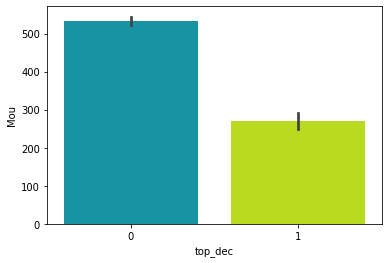

In [315]:
sns.barplot(data=prob_df, x='top_dec', y='Mou', palette='nipy_spectral')

<AxesSubplot:xlabel='top_dec', ylabel='Months'>

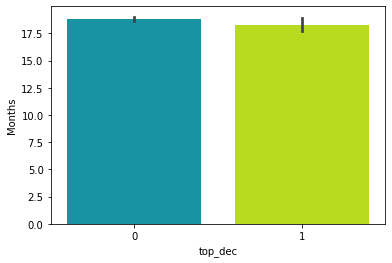

In [322]:
sns.barplot(data=prob_df, x='top_dec', y='Months', palette='nipy_spectral')

<AxesSubplot:xlabel='top_dec', ylabel='Peakvce'>

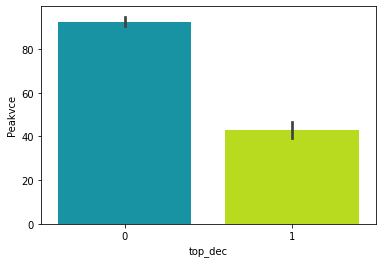

In [316]:
sns.barplot(data=prob_df, x='top_dec', y='Peakvce', palette='nipy_spectral')

<AxesSubplot:xlabel='top_dec', ylabel='Unansvce'>

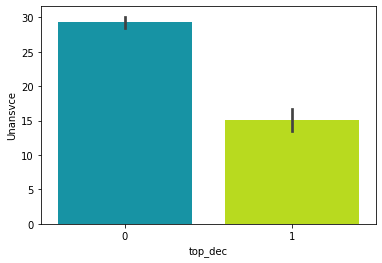

In [317]:
sns.barplot(data=prob_df, x='top_dec', y='Unansvce', palette='nipy_spectral')

<AxesSubplot:xlabel='top_dec', ylabel='Recchrge'>

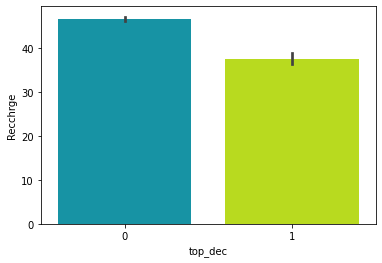

In [318]:
sns.barplot(data=prob_df, x='top_dec', y='Recchrge', palette='nipy_spectral')

<AxesSubplot:xlabel='top_dec', ylabel='Outcalls'>

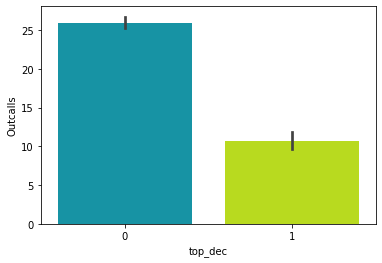

In [319]:
sns.barplot(data=prob_df, x='top_dec', y='Outcalls', palette='nipy_spectral')

<AxesSubplot:xlabel='top_dec', ylabel='Dropvce'>

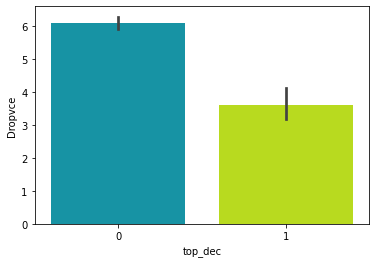

In [320]:
sns.barplot(data=prob_df, x='top_dec', y='Dropvce', palette='nipy_spectral')

<AxesSubplot:xlabel='top_dec', ylabel='Incalls'>

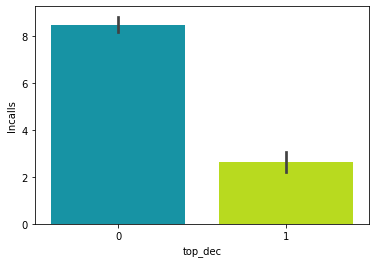

In [321]:
sns.barplot(data=prob_df, x='top_dec', y='Incalls', palette='nipy_spectral')